In [125]:
import cv2
import numpy as np

video_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/Walt Disney Animation Studios-Steamboat Willie Intro.mp4"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()
ret, prev_frame = cap.read()

if not ret:
    print("Error: Could not read the video frame.")
    exit()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)
fps = cap.get(cv2.CAP_PROP_FPS)

while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
    timestamp = frame_number / fps
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(prev_gray, gray)
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue  
        
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, "Motion", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
    timestamp_text = f"Timestamp: {timestamp:.2f} seconds"
    cv2.putText(frame, timestamp_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    cv2.imshow("Motion Detection", frame)

    prev_gray = gray.copy()

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Detected Sentiments: ['Neutral', 'Happy', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Sad']
Overall Crowd Sentiment: Neutral


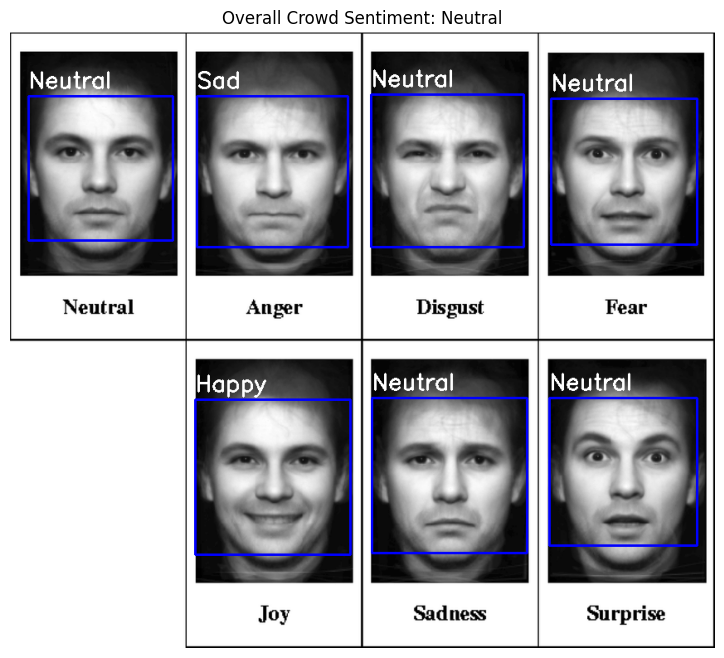

In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained Haar cascades for face, eye, and smile detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Function to detect faces using Haar cascades
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
    return faces

# Function to classify emotions
def classify_emotion(face_img):
    gray_face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    height, width = gray_face.shape

    # Detect smile
    smiles = smile_cascade.detectMultiScale(gray_face, scaleFactor=1.9, minNeighbors=20)

    # If a smile is detected, classify as happy
    if len(smiles) > 0:
        return "Happy"

    # Otherwise, detect sadness using the mouth's downward arc
    mouth_region = gray_face[int(height * 2 / 3):, :]  
    mouth_mean = np.mean(mouth_region)

    # Analyze the mouth curve for sadness (downward arc)
    middle_row = mouth_region[mouth_region.shape[0] // 2, :]
    left_part = np.mean(middle_row[:len(middle_row) // 2])
    right_part = np.mean(middle_row[len(middle_row) // 2:])

    # Sadness condition: Downward arc of the mouth (middle is lower than edges)
    if left_part > mouth_mean and right_part > mouth_mean:
        return "Sad"
    else:
        return "Neutral"

# Main function to process the image
def process_image(image_path):
    img = cv2.imread(image_path)
    faces = detect_faces(img)
    
    sentiments = []

    for (x, y, w, h) in faces:
        face_img = img[y:y+h, x:x+w]
        emotion = classify_emotion(face_img)
        sentiments.append(emotion)

        # Draw rectangle around face and label the emotion
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

    # Majority sentiment in the crowd
    if sentiments:
        overall_sentiment = max(set(sentiments), key=sentiments.count)
    else:
        overall_sentiment = "No faces detected"

    # Display result
    print(f"Detected Sentiments: {sentiments}")
    print(f"Overall Crowd Sentiment: {overall_sentiment}")

    # Convert BGR to RGB for plotting
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image with detected faces and emotions
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.title(f"Overall Crowd Sentiment: {overall_sentiment}")
    plt.show()

# Example usage
image_path = r"C:\Users\91924\Downloads\Ekmans-7-basic-emotions-and-corresponding-facial-expressions.png"
process_image(image_path)


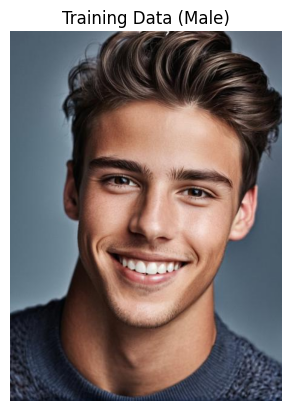

Features for Male:
Aspect Ratio: 1.00
Area: 102400.00
Jawline Length: 160.00
Eye Distance: 128.00
Nose Width: 64.00
Mouth Width: 96.00
LBP Mean Value: 4.79
--------------------------------------------------


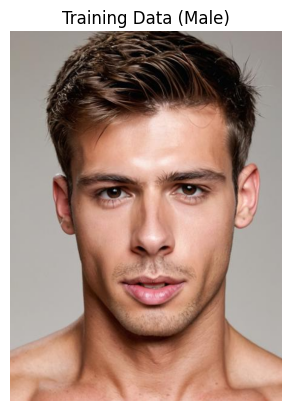

Features for Male:
Aspect Ratio: 1.00
Area: 106276.00
Jawline Length: 163.00
Eye Distance: 130.40
Nose Width: 65.20
Mouth Width: 97.80
LBP Mean Value: 4.94
--------------------------------------------------


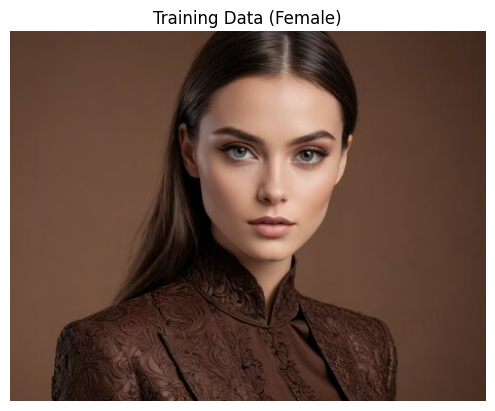

Features for Female:
Aspect Ratio: 1.00
Area: 29929.00
Jawline Length: 86.50
Eye Distance: 69.20
Nose Width: 34.60
Mouth Width: 51.90
LBP Mean Value: 5.00
--------------------------------------------------


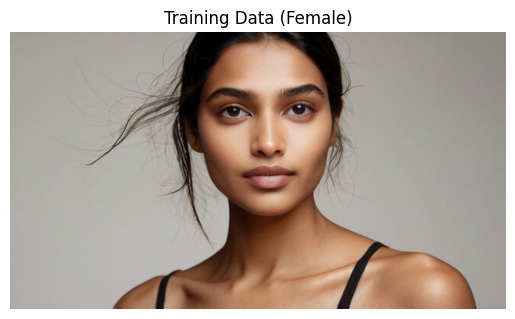

Features for Female:
Aspect Ratio: 1.00
Area: 40000.00
Jawline Length: 100.00
Eye Distance: 80.00
Nose Width: 40.00
Mouth Width: 60.00
LBP Mean Value: 4.61
--------------------------------------------------


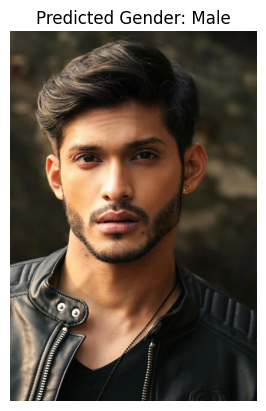

Extracted Features for C:/Users/91924/Downloads/rishi.jpg:
Aspect Ratio: 1.00
Area: 274576.00
Jawline Length: 262.00
Eye Distance: 209.60
Nose Width: 104.80
Mouth Width: 157.20
LBP Mean: 5.05
Predicted Gender: Male because the jawline value is greater than 150.00


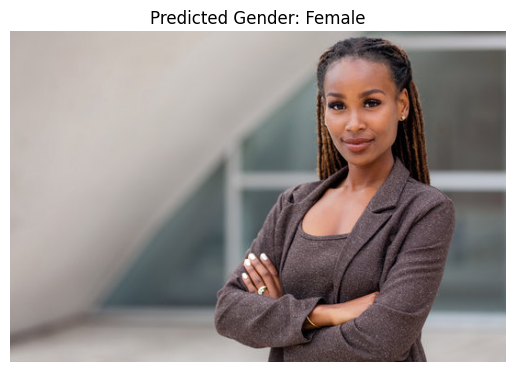

Extracted Features for C:/Users/91924/Downloads/360_F_299035676_iRQZfxrwzPFdRVRhCGAwyByXBlgNktpI.jpg:
Aspect Ratio: 1.00
Area: 12544.00
Jawline Length: 56.00
Eye Distance: 44.80
Nose Width: 22.40
Mouth Width: 33.60
LBP Mean: 4.66
Predicted Gender: Female because the jawline value is not greater than 150.00


In [127]:
import cv2
import os
import numpy as np
from skimage.feature import local_binary_pattern
from matplotlib import pyplot as plt

cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

radius = 1
n_points = 8 * radius

threshold_value = 150 

def extract_geometric_features(face_roi, x, y, w, h):
    aspect_ratio = w / h
    area = w * h 
    
    jawline_length = w * 0.5  
    eye_distance = w * 0.4 
    nose_width = w * 0.2  
    mouth_width = w * 0.3  

    return {
        'aspect_ratio': aspect_ratio,
        'area': area,
        'jawline_length': jawline_length,
        'eye_distance': eye_distance,
        'nose_width': nose_width,
        'mouth_width': mouth_width
    }

# Function to detect face, extract features, and classify gender
def extract_features(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return None
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces using Haar Cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print(f"No face detected in image at {image_path}")
        return None

    # Only process the first detected face
    (x, y, w, h) = faces[0]
    face_roi = gray[y:y+h, x:x+w]  

    # Extract geometric features directly from the face ROI
    geometric_features = extract_geometric_features(face_roi, x, y, w, h)

    # Extract texture features using Local Binary Patterns (LBP)
    lbp = local_binary_pattern(face_roi, n_points, radius, method="uniform")
    lbp_mean = np.mean(lbp)

    # Return all features as a dictionary
    return {
        'aspect_ratio': geometric_features['aspect_ratio'],
        'area': geometric_features['area'],
        'jawline_length': geometric_features['jawline_length'],
        'eye_distance': geometric_features['eye_distance'],
        'nose_width': geometric_features['nose_width'],
        'mouth_width': geometric_features['mouth_width'],
        'lbp_mean': lbp_mean
    }

# Function for rule-based gender classification using geometric features
def classify_gender(features):
    # Simple rule-based classification (based on geometric features)
    if features['jawline_length'] > threshold_value:
        return 'Male'
    else:
        return 'Female'

# Display facial features for training images
def display_training_features(image_path, gender):
    features = extract_features(image_path)

    if features:
        img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Training Data ({gender})")
        plt.axis('off')
        plt.show()

        # Display extracted features
        print(f"Features for {gender}:")
        print(f"Aspect Ratio: {features['aspect_ratio']:.2f}")
        print(f"Area: {features['area']:.2f}")
        print(f"Jawline Length: {features['jawline_length']:.2f}")
        print(f"Eye Distance: {features['eye_distance']:.2f}")
        print(f"Nose Width: {features['nose_width']:.2f}")
        print(f"Mouth Width: {features['mouth_width']:.2f}")
        print(f"LBP Mean Value: {features['lbp_mean']:.2f}")
        print("-" * 50)

# Function to process training images and limit to 4 (2 male, 2 female)
def process_training_directory(directory, gender, limit=2):
    count = 0
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        if img_path.endswith(('.png', '.jpg', '.jpeg')):  
            display_training_features(img_path, gender)
            count += 1
            if count >= limit:  # Stop after displaying the limit
                break

# Directory paths for male and female images
male_dir = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/genderc/man"
female_dir = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/genderc/woman"

# Process only 2 male and 2 female images
process_training_directory(male_dir, "Male", limit=2)
process_training_directory(female_dir, "Female", limit=2)

# Test images to classify gender
test_images = [
    "C:/Users/91924/Downloads/rishi.jpg",
    "C:/Users/91924/Downloads/360_F_299035676_iRQZfxrwzPFdRVRhCGAwyByXBlgNktpI.jpg"
]

# Function to classify and display test images
def classify_and_display(image_path):
    # Extract features from the test image
    features = extract_features(image_path)

    if features:
        # Classify gender
        gender_prediction = classify_gender(features)

        # Show image and predicted gender
        img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Predicted Gender: {gender_prediction}")
        plt.axis('off')
        plt.show()

        # Print extracted features
        print(f"Extracted Features for {image_path}:")
        print(f"Aspect Ratio: {features['aspect_ratio']:.2f}")
        print(f"Area: {features['area']:.2f}")
        print(f"Jawline Length: {features['jawline_length']:.2f}")
        print(f"Eye Distance: {features['eye_distance']:.2f}")
        print(f"Nose Width: {features['nose_width']:.2f}")
        print(f"Mouth Width: {features['mouth_width']:.2f}")
        print(f"LBP Mean: {features['lbp_mean']:.2f}")

        # Add the line for predicted gender based on jawline length
        if features['jawline_length'] > threshold_value:
            print(f"Predicted Gender: Male because the jawline value is greater than {threshold_value:.2f}")
        else:
            print(f"Predicted Gender: Female because the jawline value is not greater than {threshold_value:.2f}")
        
        print("=" * 50)

# Classify and display results for test images
for test_img in test_images:
    classify_and_display(test_img)
